##1. Загрузка данных

**Набор данных:** "Bird and Mammal Census (CalCOFI, NMFS, CPR)"

**Ссылка:** https://www.kaggle.com/datasets/jishnukoliyadan/bird-and-mammal-census-calcofi-nmfs-cpr/code?select=NMFS_cruise_transect_log.csv

**Файлы:**
- CPR_cruise_observations.csv (данные о количестве птиц и млекопитающих),
- CPR_cruise_transect_log.csv (логи с данными наблюдений).
- names.csv (полные наименования особей с указанием вида)

Таблицы CPR_cruise_observations.csv и CPR_cruise_transect_log.csv связаны идентификатором наблюдения (GIS key).

In [144]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [145]:
df_observations = pd.read_csv('CPR_cruise_observations.csv')
df_observations.head()

,GIS key,Species,Behavior,Count
0,CPR20030928F1,BUSH,1,2
1,CPR20030928F2,SOSH,1,1
2,CPR20030928F4,SOSH,1,2
3,CPR20030928F5,SOSH,1,1
4,CPR20030928F7,SOSH,1,1


In [146]:
df_transect_log = pd.read_csv('CPR_cruise_transect_log.csv', na_values=[''])
df_transect_log.head()

,GIS key,Cruise,Transect number,Bin number,Date,Time (sec),Latitude Start (º),Longitude Start (º),Latitude Mid (º),Longitude Mid (º),Latitude Stop (º),Longitude Stop (º),Length (m),Width (m),Area (m²),Depth (m),Julian date,Julian day,SVY,Season
0,CPR20030928F1,CPR2003_09,1,1,2003-09-28,1619.9,48.997749,-126.495000,48.990874,-126.512715,48.984000,-126.530430,3000.0,400,1200000.0,NaN,3271,271,CPR,Fall
1,CPR20030928F10,CPR2003_09,1,10,2003-09-28,1724.3,49.119882,-126.815194,49.113193,-126.833108,49.106504,-126.851023,3000.0,400,1200000.0,NaN,3271,271,CPR,Fall
2,CPR20030928F11,CPR2003_09,1,11,2003-09-28,1731.3,49.133259,-126.851023,49.126571,-126.868937,49.119882,-126.886851,3000.0,400,1200000.0,NaN,3271,271,CPR,Fall
3,CPR20030928F12,CPR2003_09,1,12,2003-09-28,1738.3,49.146637,-126.886851,49.139948,-126.904765,49.133259,-126.922679,3000.0,400,1200000.0,NaN,3271,271,CPR,Fall
4,CPR20030928F13,CPR2003_09,1,13,2003-09-28,1745.2,49.160014,-126.922679,49.153326,-126.940594,49.146637,-126.958508,3000.0,400,1200000.0,NaN,3271,271,CPR,Fall


## 2. Первичное изучение данных

In [147]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22983 entries, 0 to 22982
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GIS key   22983 non-null  object
 1   Species   22983 non-null  object
 2   Behavior  22983 non-null  int64 
 3   Count     22983 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 718.3+ KB


In [148]:
df_transect_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GIS key              7038 non-null   object 
 1   Cruise               7038 non-null   object 
 2   Transect number      7038 non-null   int64  
 3   Bin number           7038 non-null   int64  
 4   Date                 7038 non-null   object 
 5   Time (sec)           7038 non-null   float64
 6   Latitude Start (º)   7038 non-null   float64
 7   Longitude Start (º)  7038 non-null   float64
 8   Latitude Mid (º)     7038 non-null   float64
 9   Longitude Mid (º)    7038 non-null   float64
 10  Latitude Stop (º)    7038 non-null   float64
 11  Longitude Stop (º)   7038 non-null   float64
 12  Length (m)           7038 non-null   float64
 13  Width (m)            7038 non-null   int64  
 14  Area (m²)            7038 non-null   float64
 15  Depth (m)            815 non-null    f

Для простоты обращения к столбцам df_transect_log можно заменить некоторые нестандартные символы в их наименованиях.

In [149]:
df_transect_log.columns = df_transect_log.columns.str.replace(r'º', 'o')
df_transect_log.columns = df_transect_log.columns.str.replace(r'²', '2')

Кроме того, в df_transect_log стоит исправит тип данных для колонок 'Date' на datetime64 и 'Width (m)' на float64 (в случае обновления данных ширина все таки может быть нецелочисленная).

In [150]:
df_transect_log['Date'] = pd.to_datetime(df_transect_log['Date'], format='%Y-%m-%d')
df_transect_log['Width (m)'] = df_transect_log['Width (m)'].astype('float64')

In [151]:
df_transect_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   GIS key              7038 non-null   object        
 1   Cruise               7038 non-null   object        
 2   Transect number      7038 non-null   int64         
 3   Bin number           7038 non-null   int64         
 4   Date                 7038 non-null   datetime64[ns]
 5   Time (sec)           7038 non-null   float64       
 6   Latitude Start (o)   7038 non-null   float64       
 7   Longitude Start (o)  7038 non-null   float64       
 8   Latitude Mid (o)     7038 non-null   float64       
 9   Longitude Mid (o)    7038 non-null   float64       
 10  Latitude Stop (o)    7038 non-null   float64       
 11  Longitude Stop (o)   7038 non-null   float64       
 12  Length (m)           7038 non-null   float64       
 13  Width (m)            7038 non-nul

## 3. Визуализация

### Bar chart

Диаграмма количества трансект для каждой экспедиции

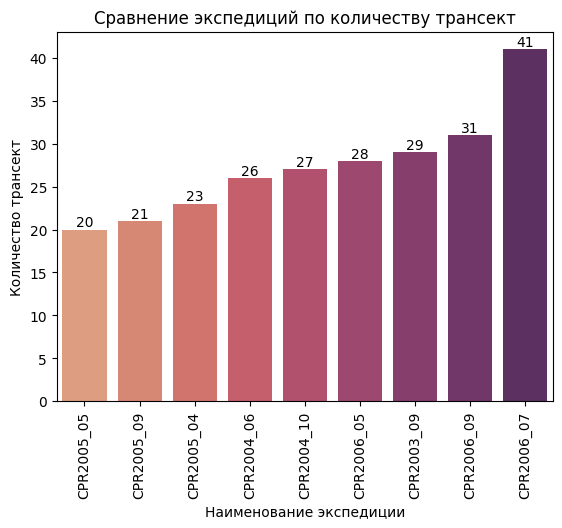

In [155]:
df_plt = df_transect_log.groupby('Cruise')['Transect number'].max().sort_values().reset_index()
sns.barplot(x=df_plt['Cruise'], y=df_plt['Transect number'], palette='flare')
for i, value in enumerate(df_plt['Transect number'].values):
    plt.text(i, value, int(value), horizontalalignment='center', verticalalignment='bottom')
plt.title('Сравнение экспедиций по количеству трансект')
plt.xticks(rotation=90)
plt.xlabel('Наименование экспедиции')
plt.ylabel('Количество трансект')
plt.show()

На диаграмме явно выделяется экспедиция CPR2006_09, у нее больше всего исследованных трансект.

Кроме того, можно заметить, что в 2003 и 2006 годах количество трансект больше чем в 2005 и 2004.

### Pie chart

Диаграмма распределения наблюдений по сезонам

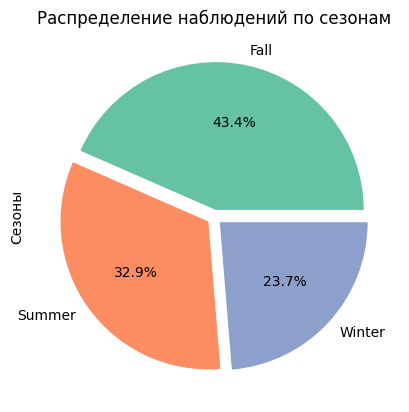

In [156]:
df_transect_log['Season'].value_counts().plot(kind='pie', autopct="%.1f%%",
                                              colors=sns.color_palette('Set2'),
                                              explode=[0.05]*3)
plt.title('Распределение наблюдений по сезонам')
plt.ylabel('Сезоны')
plt.show()

Не самая читаемая диаграмма, но а рамках 3 категорий можно сказать следующее:
- осенью наблюдений было больше всего (43.4%)
- зимой меньше всего (23.7%)
- весной эспедиций не было

### Line chart

График, отображающий динамику наблюдений (их количество) за каждый месяц экспедиции

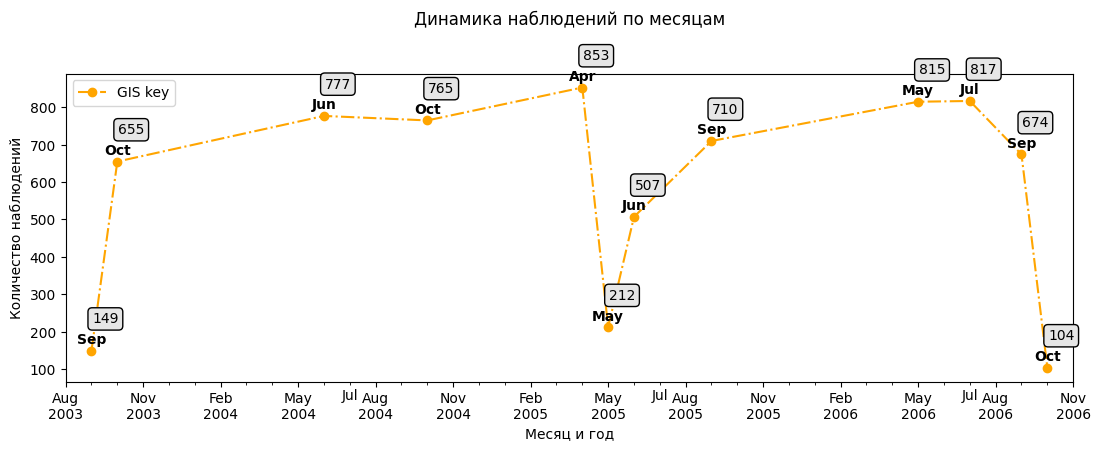

In [157]:
from ipywidgets.widgets.widget_media import text_type
# в колонке 'Date' - год и месяц, в колонке 'GIS key' - количество наблюдений за каждый период
key = df_transect_log['Date'].dt.to_period('M')
df_plt = df_transect_log.groupby(key)['GIS key'].count().reset_index().sort_values('Date')

# для создания списка делений на оси х
# freq - частота делений вычисляемая, тк на графике некрасиво отображаются значения делений в случае, когда их много
# months_list - список делений
start = min(df_transect_log['Date'])
end = max(df_transect_log['Date'])
delta = relativedelta(end, start)
freq = str((delta.years * 12 + delta.months) // len(df_plt)) + 'M'
months_list = [i.strftime('%b\n%Y') for i in
               pd.date_range(start - relativedelta(months=1),
                             end + relativedelta(months=2), freq=freq)]

df_plt.plot(x='Date', y='GIS key', figsize=[13,4], color='orange',  marker='o', linestyle='-.', )

for key, value in zip(df_plt['Date'], df_plt['GIS key']):
  plt.annotate(value,
               (key, value),
               textcoords='offset points',
               xytext=(10,20),
               ha='center',
               bbox = dict(boxstyle="round", fc="0.9"))
  plt.annotate(key.strftime('%b'),
               (key, value),
               textcoords='offset points',
               fontweight='bold',
               xytext=(0,5),
               ha='center')

plt.xticks(months_list, months_list)
plt.xlabel('Месяц и год')
plt.ylabel('Количество наблюдений')
plt.title('Динамика наблюдений по месяцам\n\n')
plt.show()

Сразу можно отметить, что больше всего наблюдений было отмечено в апреле 2005 года (853).

При этом меньше всего наблюдений в сентябре 2003 года (149), мае 2005 года (212) и октябре 2006 года (104).

Так же стоит отметить, что в 2005 и 2006 годах экспедиции были чаще по сравнению с 2003 и 2004 годами.

### Boxplot

Распределение средних широты и долготы (зафиксированные в средней точке трансекта)

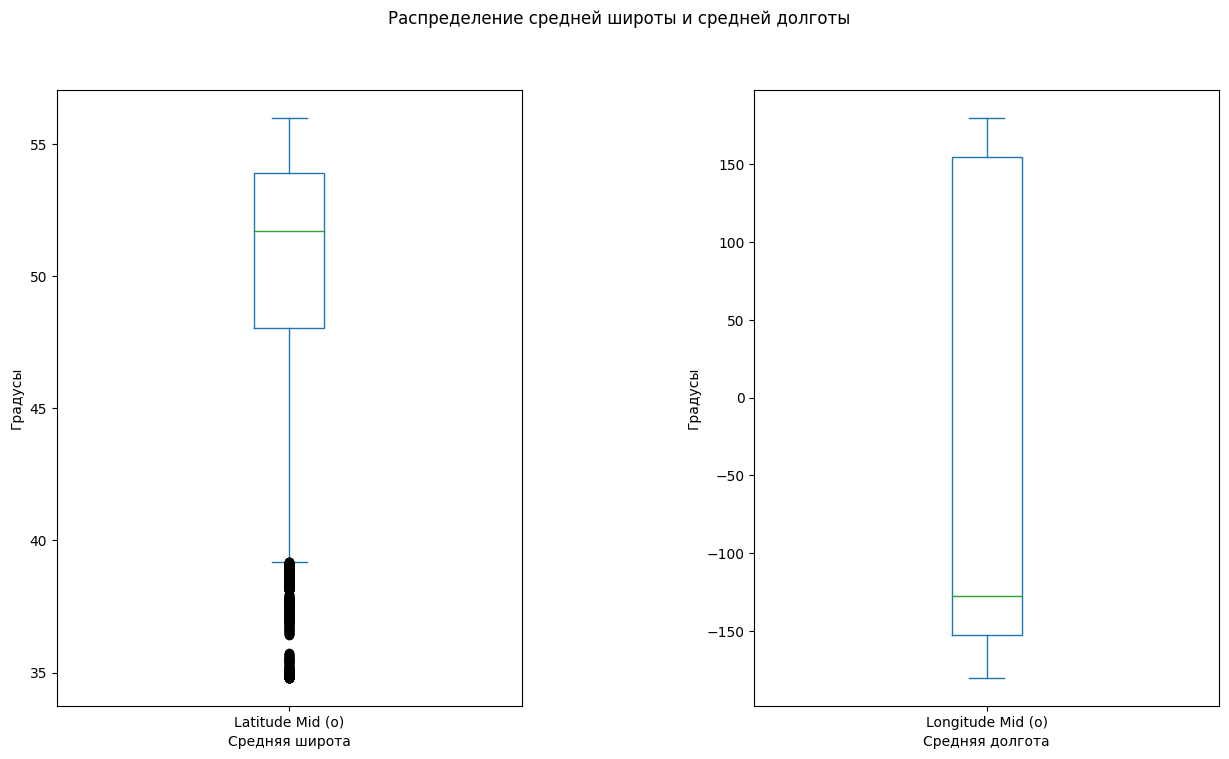

In [158]:
df_transect_log[['Latitude Mid (o)', 'Longitude Mid (o)']].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 8),
    title='Распределение средней широты и средней долготы',
    xlabel='Средняя широта',
    ylabel='Градусы'
)
plt.xlabel('Средняя долгота')
plt.ylabel('Градусы')
plt.subplots_adjust(wspace=0.5)
plt.show()

Распределения средней широты и средней долготы значительно отличаются:
- межквартильный размах у средней долготы гораздо больше, т.е. на разнообразнее
- у средней широты имеются выбросы

Количество выбросов для средней широты:

In [159]:
q1 = df_transect_log['Latitude Mid (o)'].quantile(0.25)
q3 = df_transect_log['Latitude Mid (o)'].quantile(0.75)
iqr = q3 - q1
upper = q1 + 1.5*iqr
lower = q1 - 1.5*iqr
df_transect_log[(df_transect_log['Latitude Mid (o)'] < lower) |
                (df_transect_log['Latitude Mid (o)'] > upper)]['Latitude Mid (o)'].count()

408

### Bubble map

Распределение средних значений долготы и широты, округленных до целого значения, на карте. Радиус круга зависит от количество наблюдений в данной точке.

In [160]:
df_plt = df_transect_log[['GIS key', 'Latitude Mid (o)', 'Longitude Mid (o)']]
df_plt['Latitude Mid (o)'] = df_plt['Latitude Mid (o)'].round(0)#.astype(int)
df_plt['Longitude Mid (o)'] = df_plt['Longitude Mid (o)'].round(0)#.astype(int)

<ipython-input-160-88b6fb084dec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-160-88b6fb084dec>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
df_plt = df_plt.groupby(['Latitude Mid (o)', 'Longitude Mid (o)']).count().reset_index()
df_plt.columns = ['Latitude', 'Longitude', 'Count']
df_plt.head()

,Latitude,Longitude,Count
0,35.0,140.0,89
1,35.0,141.0,28
2,36.0,141.0,12
3,36.0,142.0,4
4,37.0,141.0,47


In [162]:
import folium

n = folium.Map(
    location=[df_plt.Latitude[0],df_plt.Longitude[0]],
    tiles="OpenStreetMap",
    zoom_start=5
    )

for row in df_plt.itertuples():
    folium.CircleMarker(
        location=[row.Latitude, row.Longitude],
        radius=float(row.Count),
        color='#DB7093',
        fill=True,
        fill_color='#FFC0CB'
   ).add_to(n)

n.get_root().html.add_child(folium.Element("<h3 align='center'>Карта распледеления округленных средних значений широты и долготы</h3>"))

n

Данный способ отображаения позволяет наглядно показать распределение наблюдений на карте:
- сразу можно сказать, что экспедиции проводились северной части Тихого океана
- большое количество наблюдений обнаружено возле Японии, Камчатки и некоторых островов Берингова моря

### Heatmap

Взаимосвязь между экспедициями и наблюдениями для млекопитиющих

In [163]:
# датафрейм с расшифровками кодов животных, с указанием вида (птицы/млекопитающие) и наименования

df_names = pd.read_csv('names.csv', sep=';')
df_names.head()

,Code,Name,Kind
0,BRPE,Brown Pelican,bird
1,BRCO,Brandt,bird
2,PALO,Pacific Loon,bird
3,BFAL,Black-footed Albatross,bird
4,NOFU,Northern Fulmar,bird


In [164]:
df_plt = df_names.loc[df_names['Kind'] == 'mammal']
df_plt = df_plt.merge(df_observations, left_on='Code', right_on='Species')
df_plt = df_plt.merge(df_transect_log, left_on='GIS key', right_on='GIS key')
df_plt = df_plt[['Cruise', 'Code', 'Name', 'Count', 'GIS key']]
df_plt.head()

,Cruise,Code,Name,Count,GIS key
0,CPR2004_10,CBWH,Cuviers beaked whale,12,CPR20041018F738
1,CPR2004_10,CBWH,Cuviers beaked whale,2,CPR20041018F748
2,CPR2003_09,BBWH,Bairds beaked whale or Blainville's beaked whale,7,CPR20031002F259
3,CPR2006_09,BBWH,Bairds beaked whale or Blainville's beaked whale,12,CPR20061003F716
4,CPR2005_04,BLWH,Blue whale,1,CPR20050406F127


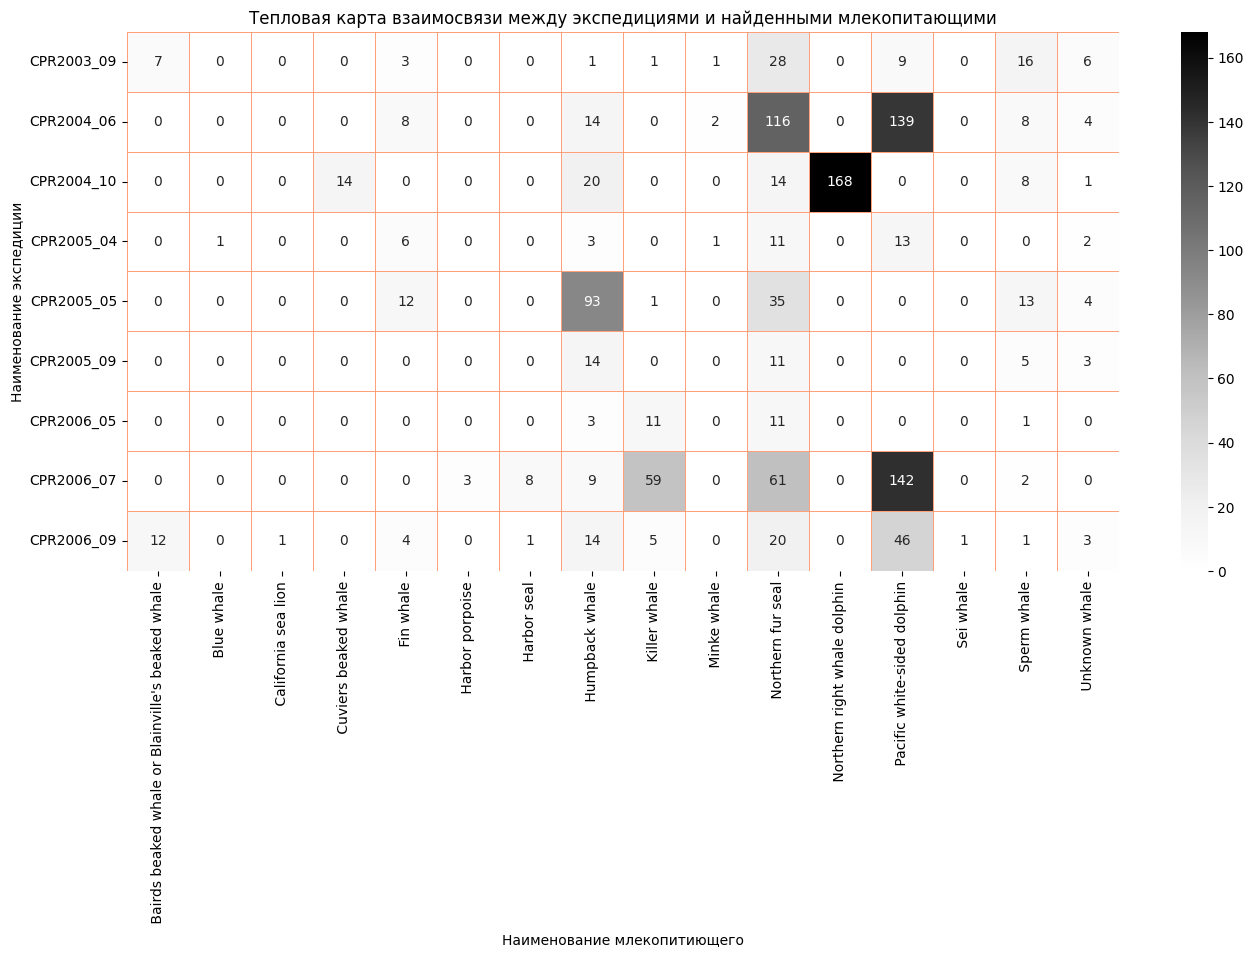

In [165]:
pivot_df_plt = df_plt.pivot_table(
    index='Cruise',
    columns='Name',
    values='Count',
    aggfunc=sum
).fillna(0)

plt.subplots(figsize=(16, 7))
sns.heatmap(
    pivot_df_plt,
    cmap='Greys',
    linewidth=0.5,
    linecolor='#FFA07A',
    annot=True,
    fmt='g'
).set(title='Тепловая карта взаимосвязи между экспедициями и найденными млекопитающими',
      xlabel='Наименование млекопитиющего',
      ylabel='Наименование экспедиции')
plt.show()

Для экспедиций CPR2003_09 и CPR2006_09 стоит отметить большое разнообразие наблюдаемых животных.

По количеству наблюдаемых животных можно отметить топ-4 млекопитающих:
- Pacific white-sided dolphin (всего 349 особей)
- Northern fur seal (всего 307 особей)
- Northern right whale dolphin (всего 168 особей)
- Humpback whale (всего 171 особь)

### Scatter plot matrix

- количество особей (группировка по Species + сумма Count)
- Time (sec)
- Julian date

In [166]:
df_plt = df_observations.groupby('GIS key')['Count'].count().reset_index().sort_values('Count')
df_plt = df_plt.merge(df_transect_log, left_on='GIS key', right_on='GIS key')
df_plt.head()

,GIS key,Count,Cruise,Transect number,Bin number,Date,Time (sec),Latitude Start (o),Longitude Start (o),Latitude Mid (o),...,Latitude Stop (o),Longitude Stop (o),Length (m),Width (m),Area (m2),Depth (m),Julian date,Julian day,SVY,Season
0,CPR20030928F1,1,CPR2003_09,1,1,2003-09-28,1619.9,48.997749,-126.495000,48.990874,...,48.984000,-126.530430,3000.0,400.0,1200000.0,NaN,3271,271,CPR,Fall
1,CPR20050918F51,1,CPR2005_09,4,51,2005-09-18,1018.2,50.219980,-136.773483,50.223004,...,50.226028,-136.814602,3000.0,400.0,1200000.0,NaN,5261,261,CPR,Fall
2,CPR20050918F53,1,CPR2005_09,4,53,2005-09-18,1037.4,50.208905,-136.855884,50.211673,...,50.214442,-136.897166,3000.0,400.0,1200000.0,NaN,5261,261,CPR,Fall
3,CPR20050918F56,1,CPR2005_09,4,56,2005-09-18,1110.1,50.192291,-136.979730,50.195060,...,50.197829,-137.021012,3000.0,400.0,1200000.0,NaN,5261,261,CPR,Fall
4,CPR20050918F59,1,CPR2005_09,4,59,2005-09-18,1142.8,50.174637,-137.103342,50.177639,...,50.180642,-137.144434,3000.0,400.0,1200000.0,NaN,5261,261,CPR,Fall


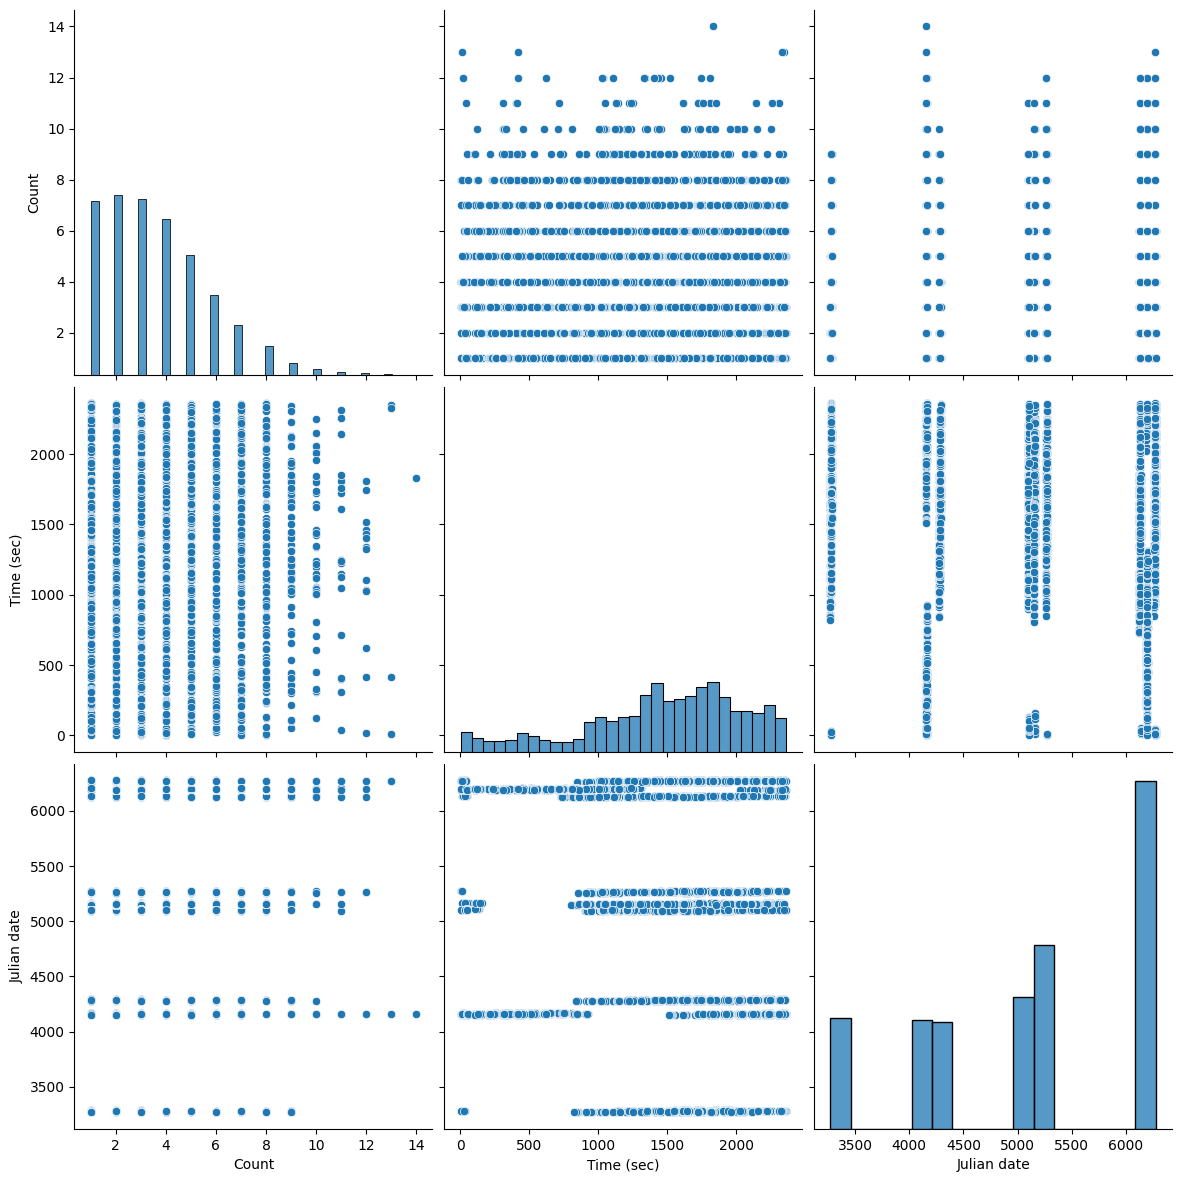

In [167]:
sns.pairplot(df_plt[['Count', 'Time (sec)', 'Julian date']], height=4)

Количество наблюдаемых особей:
- на гистограмме видно, что в основном наблюдение охватывает большое количество особей
- зависит от продолжительности наблюдения, когда оно длится более 1000 секунд
- зависит от Юлианской даты (количество наблюдений немного увеличивается с увеличением даты)

Юлианская дата:
- количество наблюдений в целом увеличивается с ростом даты

Продолжительность экспедиции (в секундах):
- на гистограмме заметно, что более продолжительных наблюдений больше
- как таковой зависимости от Юлианской даты нет, но, если посмотреть на ранее построенный график динамики наблюдений по месяцам, то можно предположить, что малое количество наблюдений на нем как раз связано с продолжительностью экспедиции (что нельзя было сказать, построив только линейный график динамики наблюдений за каждый месяц экспедиции)

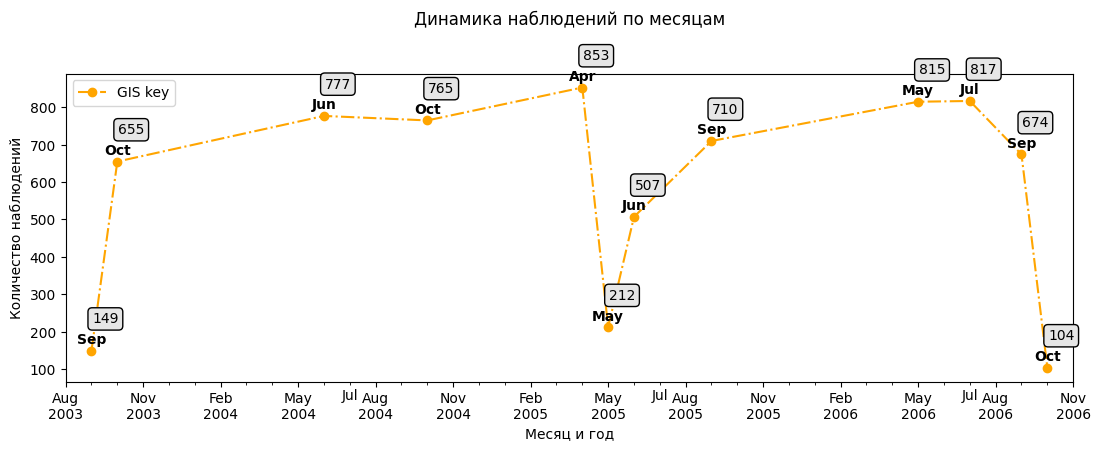